Objective: 
1) How many medications are available on GoodRx.com?
2) How many pharmacies are available on GoodRx.com?
3) Which pharmacy offers the best coupon through GoodRx.com?
4) Get the average price of per drug
5) What is the most expensive medication and least expensive medication?




In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [303]:
#pip install openpyxl

In [304]:
# Load dataset
df = pd.read_excel("/Users/juanhernandez/Desktop/VS Code Python/Data/az_grx.xlsx", index_col=0)

In [305]:
# 1) How many medications are available on GoodRx.com?
uniqueDrugs = []

for x in range(1,len(df)):

    if df['Drug'][x] not in uniqueDrugs:
        uniqueDrugs.append(df['Drug'][x])

len(uniqueDrugs) #348 drugs are available

348

In [306]:
#uniqueDrugs

In [307]:
# 2) How many pharmacies are available on GoodRx.com?
uniquePharmacies = []

for x in range(1,len(df)):

    if df['Pharmacy'][x] not in uniquePharmacies:
        uniquePharmacies.append(df['Pharmacy'][x])

len(uniquePharmacies) #12 different pharmacies. Of note CVS is recorded as Target (CVS) and CVS Pharmacy

12

In [308]:
#uniquePharmacies

In [346]:
df_total = pd.DataFrame(columns=['Pharmacy','Total Price'])

In [347]:
# 3) Which pharmacy offers the most $ value of coupons through GoodRx.com?

for p in uniquePharmacies:
    #print('--')
    #print(p)
    price_total = 0
    
    
    for d in uniqueDrugs:
    
        try:
            #print('--')
            #print(d)      
            
            new_df = df[(df['Drug'] == d) & (df['Pharmacy'] == p)]       

            if len(new_df['Price'].values) == 0: 
                continue
                #print('No coupon')                
            else:
                #print(type(new_df['Price'].values))
                #print(new_df['Price'].item())                
                price_total = price_total + new_df['Price'].item()  
                #print(price_total)
                
        except:
                pass 
            

    #print('Adding')
    df_total.loc[p] = [p,price_total]


In [348]:
df_total.reset_index(drop=True, inplace=True)

In [349]:
df_total

,Pharmacy,Total Price
0,Walgreens,14574.64
1,Target (CVS),13785.22
2,Walmart,13619.74
3,Safeway,1641.06
4,CVS Pharmacy,14294.49
5,Costco,12459.11
6,City Market,1585.28
7,Walmart Neighborhood Market,13564.76
8,King Soopers,1587.73
9,Hy-Vee,8327.18


In [355]:
df_total.drop(index=[4], inplace=True) #Drop duplicate CVS Column

In [358]:
df_total.reset_index(drop=True, inplace=True)

In [359]:
df_total

,Pharmacy,Total Price
0,Walgreens,14574.64
1,Target (CVS),13785.22
2,Walmart,13619.74
3,Safeway,1641.06
4,Costco,12459.11
5,City Market,1585.28
6,Walmart Neighborhood Market,13564.76
7,King Soopers,1587.73
8,Hy-Vee,8327.18
9,Kroger Pharmacy,7249.74


In [360]:
df_total.sort_values(by='Total Price', ascending=False) #1.Walgreens 2.CVS 3.Walmart


,Pharmacy,Total Price
0,Walgreens,14574.64
1,Target (CVS),13785.22
2,Walmart,13619.74
6,Walmart Neighborhood Market,13564.76
4,Costco,12459.11
8,Hy-Vee,8327.18
9,Kroger Pharmacy,7249.74
10,Gerbes Pharmacy,7228.22
3,Safeway,1641.06
7,King Soopers,1587.73


In [ ]:
# 4) Get the average price per Drug
df_average = pd.DataFrame(columns=['Drug','Avg Price'])

In [ ]:
for d in uniqueDrugs:
    #print('--')
    #print(d)
    avg_price = 0
    avg_price_count = 0 
    for p in uniquePharmacies:

        try:                
            avg_df = df[(df['Drug'] == d) & (df['Pharmacy'] == p)]       

            if len(avg_df['Price'].values) == 0: 
                #print('No coupon')                
                continue
                
            else:
            #print(type(new_df['Price'].values))
                #print('Rx price')
                #print(avg_df['Price'].item())                
                
                avg_price = avg_price + avg_df['Price'].item()  
                avg_price_count +=1
                #print(avg_price)
                #print(avg_price_count)
            
        except:
            pass 
            

    #print('next')
    try:
        avg_price_f = avg_price/avg_price_count
    #print('average:')
    #print(avg_price_f)
        df_average.loc[d] = [d,avg_price_f]
    except:
        pass


In [ ]:
df_average.reset_index(drop=True, inplace = True) 

In [ ]:
df_average # The average price per medication

,Drug,Avg Price
0,amphetamine-salt-combo,16.481111
1,atorvastatin,15.932222
2,amlodipine,12.058889
3,azithromycin,12.107778
4,amoxicillin,7.072222
...,...,...
342,zafirlukast,47.710000
343,zarah,37.451111
344,zenzedi,22.442222
345,zortress,1081.698889


In [368]:
# 5 Most expensive and least expensive drug
print(df_average.sort_values(by='Avg Price', ascending=False).head(1)) # 1.Most: zortress
print(df_average.sort_values(by='Avg Price', ascending=True).head(1)) # 2.Least: kenalog

         Drug    Avg Price
345  zortress  1081.698889
        Drug  Avg Price
166  kenalog   5.062222


In [350]:
#plt.plot(df_total)
df_total.info()
print(df_total['Pharmacy'])
print(df_total['Total Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pharmacy     12 non-null     object 
 1   Total Price  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes
0                       Walgreens
1                    Target (CVS)
2                         Walmart
3                         Safeway
4                    CVS Pharmacy
5                          Costco
6                     City Market
7     Walmart Neighborhood Market
8                    King Soopers
9                          Hy-Vee
10                Kroger Pharmacy
11                Gerbes Pharmacy
Name: Pharmacy, dtype: object
0     14574.64
1     13785.22
2     13619.74
3      1641.06
4     14294.49
5     12459.11
6      1585.28
7     13564.76
8      1587.73
9      8327.18
10     7249.74
11     7228.22
Name: Total Price, dtype: float64


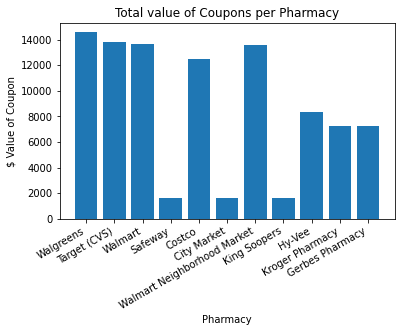

In [364]:
# Data Coordinates


x = df_total['Pharmacy']
y = df_total['Total Price']


# Plot

plt.bar(x, y) 

# Add Title

plt.title("Total value of Coupons per Pharmacy") 

# Add Axes Labels


plt.xlabel("Pharmacy") 
plt.ylabel("$ Value of Coupon") 

plt.gcf().autofmt_xdate()

# Display

plt.show()